##  ASSIGMENT 2 - SC INTRODUCTION TO DATA ANALYTICS FOR BUSINESS

# A12 (CLASSIFICATION) *Women Clothing Review*
# --> DATA PREPARATION AND VISUALIZATION
### 1. NADIRA IRSALINA DBA2134265

## DATA PREPARATION

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
string.punctuation
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [44]:
data.shape

(19662, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [10]:
data.dropna(inplace=True)

In [45]:
data.shape

(19662, 9)

### DATA CLEANING

In [12]:
data = data.drop(['Title', 'Clothing ID', 'Positive Feedback Count'], axis=1)
data.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
2,2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses
5,5,49,"I love tracy reese dresses, but this one is no...",2,0,General,Dresses,Dresses
6,6,39,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits


In [13]:
# Checking for the missing values
count_NaN = data.isnull().sum()
count_NaN

Unnamed: 0         0
Age                0
Review Text        0
Rating             0
Recommended IND    0
Division Name      0
Department Name    0
Class Name         0
dtype: int64

In [15]:
# Dropping the missing values in the rows
data = data.dropna(subset=['Review Text'], axis=0)
data = data.reset_index(drop=True)

In [17]:
data['Department Name'].describe()

count     19662
unique        6
top        Tops
freq       8713
Name: Department Name, dtype: object

In [19]:
data['Department Name'].fillna('Tops',inplace=True)

In [21]:
data['Division Name'].describe()

count       19662
unique          3
top       General
freq        11664
Name: Division Name, dtype: object

In [23]:
data['Class Name'].describe()

count       19662
unique         20
top       Dresses
freq         5371
Name: Class Name, dtype: object

In [25]:
data['Class Name'].fillna('Dresses',inplace=True)

## VISUALIZATION DATA & EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

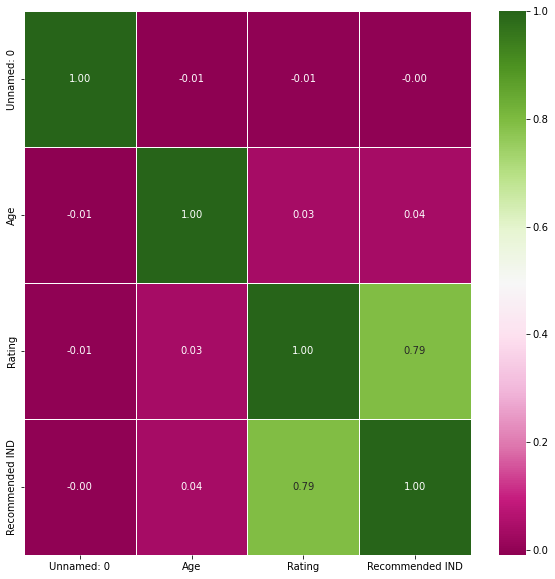

In [31]:
# plotting correlation plot

plt.figure(figsize=(10,10))
#plotting the figure size based on width and height

sns.heatmap(data.corr(),cmap='PiYG',annot=True,linewidths=1,fmt='0.2f')

Text(0, 0.5, 'Count')

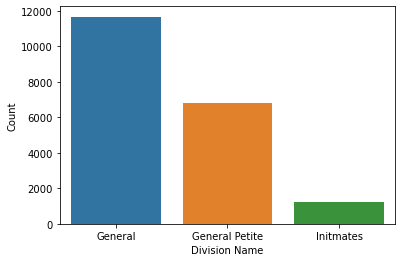

In [26]:
counts = data['Division Name'].value_counts()
counts.sort_index(inplace=True)
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Division Name')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

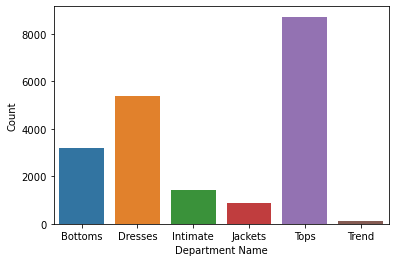

In [27]:
counts = data['Department Name'].value_counts()
counts.sort_index(inplace=True)
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Department Name')
plt.ylabel('Count')

In [28]:
data['Review Text'][2]

'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'

<AxesSubplot:xlabel='count', ylabel='Rating'>

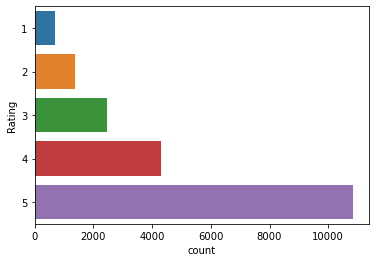

In [32]:
sns.countplot(y='Rating',data=data)

In [34]:
data['length']=data['Review Text'].apply(len)
data.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,length
0,2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,500
1,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,124
2,4,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,192
3,5,49,"I love tracy reese dresses, but this one is no...",2,0,General,Dresses,Dresses,488
4,6,39,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,496


<AxesSubplot:ylabel='Frequency'>

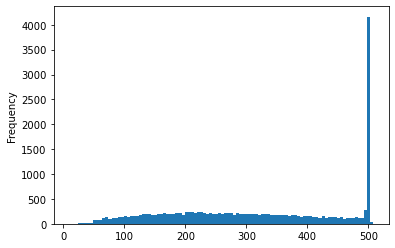

In [36]:
data['length'].plot(bins=100, kind='hist')

In [38]:
data.length.describe()

count    19662.000000
mean       318.444817
std        142.268450
min          9.000000
25%        199.000000
50%        315.000000
75%        475.000000
max        508.000000
Name: length, dtype: float64

In [40]:
data[data['length']==9]['Review Text']

6521    Great fit
Name: Review Text, dtype: object

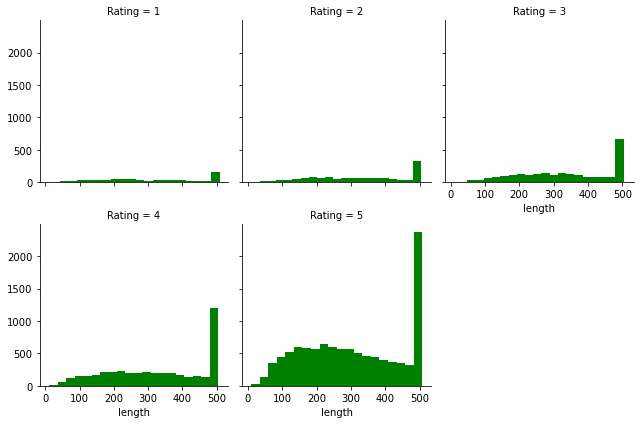

In [42]:
g_ = sns.FacetGrid(data=data, col='Rating', col_wrap=3)
g_.map(plt.hist, 'length', bins=20, color='g')

Text(0.5, 1.0, 'Age Distribution in Data')

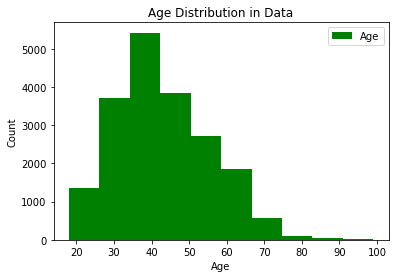

In [50]:
# The age distribution in data
plt.hist(data['Age'], color="green", label = "Age")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution in Data")


END-CODING BY NADIRA